In [7]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

<h4>1. Исходный график функции y = sin(x)</h4>

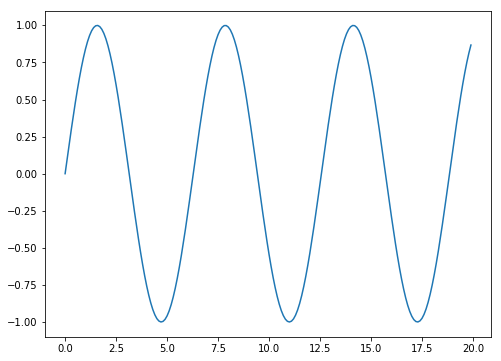

In [8]:
X = np.arange(0, 20, 0.1)
y = np.sin(X)
plt.plot(X, y);

<h4>2. Подготовка входных данных</h4>

In [9]:
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size
train, test = y[0:train_size], y[train_size:len(X)]
X_train, X_test = X[0:train_size], X[train_size:len(X)]

In [10]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
look_back = 3
trainX, trainY = create_dataset(train.reshape(-1, 1), look_back)
testX, testY = create_dataset(test.reshape(-1, 1), look_back)

<h4>3. Обучение модели</h4>

In [12]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

knn = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)
knn.fit(trainX, trainY)
trainPredict = knn.predict(trainX)
testPredict = knn.predict(testX)
print("kNN(train) mse =", mean_squared_error(trainY, trainPredict))
print("kNN(test) mse =", mean_squared_error(testY, testPredict))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.6s finished


kNN(train) mse = 0.0
kNN(test) mse = 0.000155630033629


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(trainX, trainY)
trainPredict = lin_reg.predict(trainX)
testPredict = lin_reg.predict(testX)

print("LinearRegression(train) mse =", mean_squared_error(trainY, trainPredict))
print("LinearRegression(test) mse =", mean_squared_error(testY, testPredict))

LinearRegression(train) mse = 2.92562357676e-31
LinearRegression(test) mse = 1.77774038254e-30


<h4>4. Визуализация качества модели</h4>
<p>Синяя линия - исходный график синуса</p>
<p>Оранжевая линия - предсказание модели на тренировочных данных</p>
<p>Зеленая линия - предсказание модели на тестовых данных</p>
<p>Красная линия - модель уже сама продолжает график синуса</p>

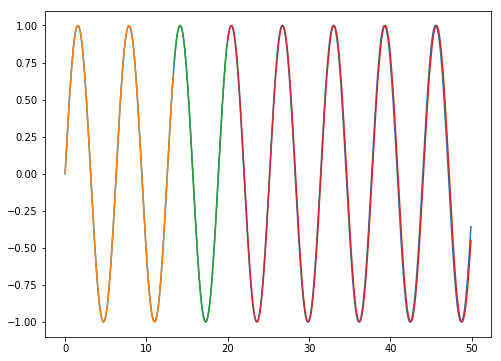

In [14]:
X = np.arange(0, 50, 0.1)
plt.plot(X,np.sin(X))
y_train_pred = np.r_[y[0:look_back], trainPredict]
plt.plot(X_train, y_train_pred)
y_test_pred = np.r_[y[train_size:train_size + look_back], testPredict]
plt.plot(X_test, y_test_pred)

Xx = np.arange(20, 50, 0.1)
yy = y[len(y) - look_back:len(y)]

nextX = yy

for i in range(len(Xx)):
    pred = knn.predict(nextX.reshape(1, -1))
    yy = np.append(yy, pred)
    nextX = np.append(nextX[1:len(nextX)], pred)

plt.plot(Xx, yy[look_back:len(yy)]);

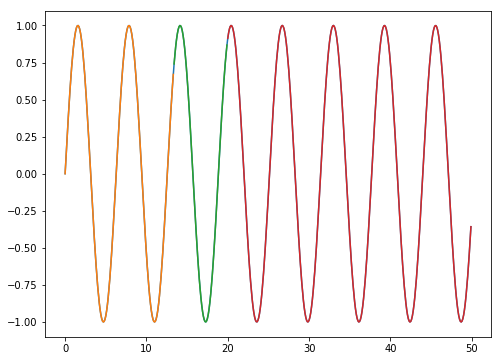

In [15]:
X = np.arange(0, 50, 0.1)
plt.plot(X,np.sin(X))
y_train_pred = np.r_[y[0:look_back], trainPredict]
plt.plot(X_train, y_train_pred)
y_test_pred = np.r_[y[train_size:train_size + look_back], testPredict]
plt.plot(X_test, y_test_pred)

Xx = np.arange(20, 50, 0.1)
yy = y[len(y) - look_back:len(y)]

nextX = yy

for i in range(len(Xx)):
    pred = lin_reg.predict(nextX.reshape(1, -1))
    yy = np.append(yy, pred)
    nextX = np.append(nextX[1:len(nextX)], pred)

plt.plot(Xx, yy[look_back:len(yy)]);

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X_train.reshape(-1, 1))
# X_train_norm = scaler.transform(X_train.reshape(-1, 1))  
# X_cv_norm = scaler.transform(X_cv.reshape(-1, 1))
# X_test_norm = scaler.transform(X_test.reshape(-1, 1))

# nn = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100))
# nn.fit(X_train_norm, y_train)
# y_pred = nn.predict(X_cv_norm)
# mean_squared_error(y_cv, y_pred)

# plt.scatter(X_train, y_train);
# plt.scatter(X_cv, y_pred);
# plt.scatter(X_test, nn.predict(X_test_norm))
# sizes = []
# for x in range(4,6):
#     for y in range(4,6):
#         for z in range(4,6):
#             sizes.append((x, y, z))

# nn_grid = GridSearchCV(nn, param_grid={
#     'alpha': 10.0 ** -np.arange(1, 7),
#     'hidden_layer_sizes': sizes},
#     cv=5, n_jobs=4, verbose=True
# )
# nn_grid.fit(X_train_norm, y_train)
# print(nn_grid.best_params_)
# print(nn_grid.best_score_)